# WeatherPy

In [1]:
# Import our modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import your OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine latitude and longitude
from citipy import citipy

In [2]:
#We're going to use citipy to generate a list of cities now.
# Make a list to hold combinations of latitudes and longitudes
latlons = []

# Make another list to hold the names of our cities
cities = []

# Set latitude and longitude ranges
latrange = (-90, 90)
lonrange = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(latrange[0], latrange[1], size=1500)
lons = np.random.uniform(lonrange[0], lonrange[1], size=1500)
lat_lons = zip(lats, lons)

# Identify the nearest city for each of these combinations
for lat_lon in lat_lons:
    city = citipy.nearest_city(lat_lon[0], lat_lon[1]).city_name
    
    # If the city is unique, then add it to an "our cities" list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm we have enough
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL and set temperature to Celsius
url = "http://api.openweathermap.org/data/2.5/weather?"
units= "Metric"

# Define an empty list to get the weather data for each individual city
city_data = []

# Print to logger to confirm successful access
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL for each city in the earlier list
    city_url = f'{url}&q={city}&appid={weather_api_key}&units={units}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve the cities' data
        cityjson=requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        citylat = cityjson["coord"]["lat"]
        citylon = cityjson["coord"]["lon"]
        citymaxtemp = cityjson["main"]["temp_max"]
        cityhumidity = cityjson["main"]["humidity"]
        cityclouds = cityjson["clouds"]["all"]
        citywind = cityjson["wind"]["speed"]
        citycountry = cityjson["sys"]["country"]
        citydate = cityjson["dt"]

        # Append the City information into our city_data list
        city_data.append({"City": city, 
                          "Lat": citylat, 
                          "Lon": citylon, 
                          "Max Temp": citymaxtemp,
                          "Humidity": cityhumidity,
                          "Cloudiness": cityclouds,
                          "Wind Speed": citywind,
                          "Country": citycountry,
                          "Date": citydate})

    # Have the city skipped if the request encounters any errors
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate a fulfilled request
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | fortuna
Processing Record 2 of Set 1 | hwange
Processing Record 3 of Set 1 | chonchi
Processing Record 4 of Set 1 | gadzhiyevo
Processing Record 5 of Set 1 | sitangkai
Processing Record 6 of Set 1 | melekeok village
Processing Record 7 of Set 1 | vanino
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | soritor
Processing Record 10 of Set 1 | stanley
Processing Record 11 of Set 1 | praia da vitoria
Processing Record 12 of Set 1 | svetlyy
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | terme
Processing Record 15 of Set 1 | pacific grove
Processing Record 16 of Set 1 | saipan
Processing Record 17 of Set 1 | margaret river
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | nova sintra
Processing Record 20 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 21 of Set 1 | inirida
Processing Record 22 of Set 1

In [4]:
# Convert city_data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Count our records to prove consistency across all parameters
city_data_df.count()

City          585
Lat           585
Lon           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,fortuna,40.5982,-124.1573,15.52,94,0,0.00,US,1697424584
1,hwange,-18.3693,26.5019,25.01,61,96,0.59,ZW,1697424501
2,chonchi,-42.6128,-73.8092,6.18,98,70,1.20,CL,1697424584
3,gadzhiyevo,69.2551,33.3362,4.91,89,98,11.90,RU,1697424585
4,sitangkai,4.6628,119.3928,28.55,68,94,1.17,PH,1697424585


In [6]:
# Export city_data to a csv
city_data_df.to_csv("../output_data/BrownWeathercities.csv", index_label="City_ID")

In [7]:
# Read the csv
city_data_df = pd.read_csv("../output_data/BrownWeathercities.csv", index_col="City_ID")

# Display your sample
city_data_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fortuna,40.5982,-124.1573,15.52,94,0,0.00,US,1697424584
1,hwange,-18.3693,26.5019,25.01,61,96,0.59,ZW,1697424501
2,chonchi,-42.6128,-73.8092,6.18,98,70,1.20,CL,1697424584
3,gadzhiyevo,69.2551,33.3362,4.91,89,98,11.90,RU,1697424585
4,sitangkai,4.6628,119.3928,28.55,68,94,1.17,PH,1697424585


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

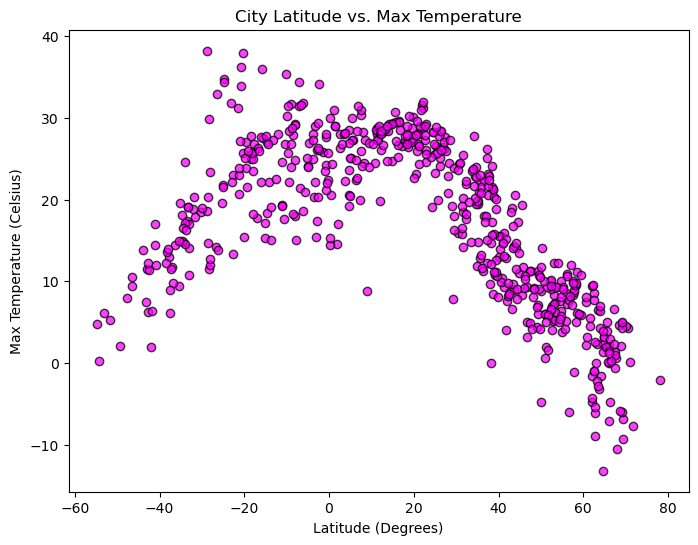

In [8]:
# Build a latitude vs. temperature scatter plot
plt.figure(figsize=(8,6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"],color="fuchsia",edgecolors="black",alpha=.75)

# Label the plot and its axes
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude (Degrees)")
plt.ylabel("Max Temperature (Celsius)")

# Save and display the plot
plt.savefig("../output_data/LatTemp.png")
plt.show()

#### Latitude Vs. Humidity

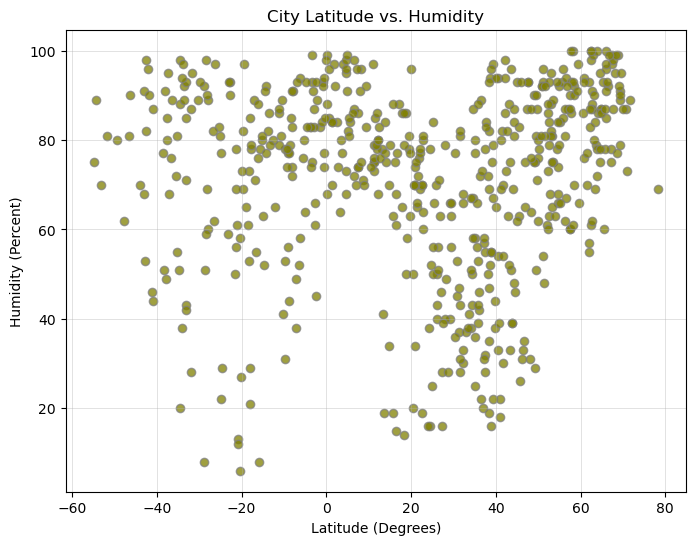

In [9]:
# Make a second one to compare latitude to humidity
plt.figure(figsize=(8,6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"],color="olive",edgecolors="gray",alpha=.75)

# Label it
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude (Degrees)")
plt.ylabel("Humidity (Percent)")
plt.grid(True, linestyle='-',linewidth=.4,alpha=.65)

# Save and display it
plt.savefig("../output_data/LatHum.png")
plt.show()

#### Latitude Vs. Cloudiness

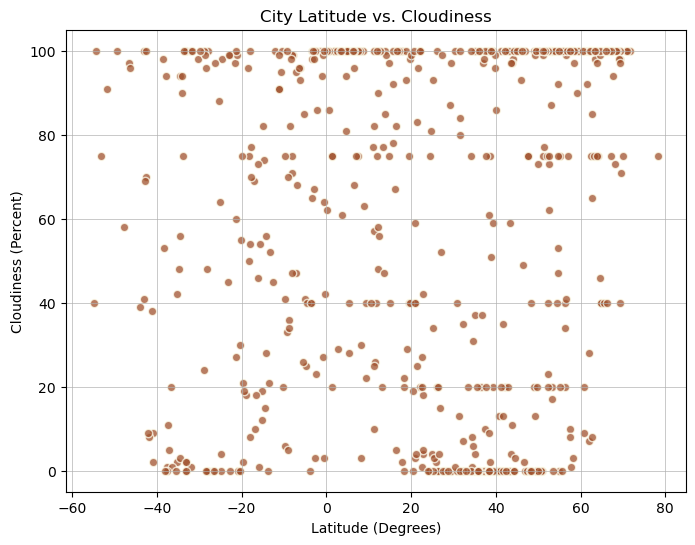

In [10]:
# Make a third scatter for latitude vs. cloudiness
plt.figure(figsize=(8,6))
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],color="sienna",edgecolors="ivory",alpha=.75)

# Labels!
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude (Degrees)")
plt.ylabel("Cloudiness (Percent)")
plt.grid(True, linestyle='-',linewidth=.6,alpha=.8)

# Save and display
plt.savefig("../output_data/LatCloud.png")
plt.show()

#### Latitude vs. Wind Speed Plot

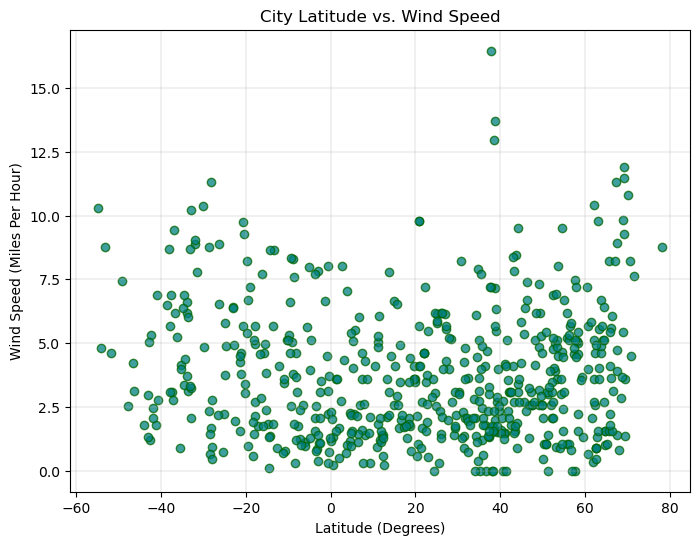

In [11]:
# Make a fourth scatter for latitude vs. wind speed
plt.figure(figsize=(8,6))
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],color="teal",edgecolor="darkgreen",alpha=.75)
# Labels, please!
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude (Degrees)")
plt.ylabel("Wind Speed (Miles Per Hour)")
plt.grid(True, linestyle='-',linewidth=.3,alpha=.9)

# Save and display
plt.savefig("../output_data/LatWind.png")
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [28]:
# We're going to linearly regress these relationships now.
def plot_linear_regression(xs, ys, xcoords, ycoords):
    plt.scatter(xs,ys)
    (m, b, rval, pvalue, stderr)=linregress(xs,ys)
    regress_values=b+(m*(xs))
    plt.plot(xs,regress_values,color="Aqua")
    line1="y="+str(round(m,2))+"x+"+str(round(b,2))
    plt.annotate(line1,(xcoords,ycoords),color="deeppink",fontsize=13, xytext=(0,0))
    plt.xlabel("Latitude (Degrees)")
    plt.ylabel(ys.name)
    print(f"The r-value is: {rval**2}")
    plt.show()

In [13]:
# Create a DataFrame for data in the Northern Hemisphere (Latitude >= 0)
nhemi=city_data_df[city_data_df["Lat"]>=0]

# Display it
nhemi.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fortuna,40.5982,-124.1573,15.52,94,0,0.00,US,1697424584
3,gadzhiyevo,69.2551,33.3362,4.91,89,98,11.90,RU,1697424585
4,sitangkai,4.6628,119.3928,28.55,68,94,1.17,PH,1697424585
5,melekeok village,7.4957,134.6367,30.31,74,75,3.60,PW,1697424585
6,vanino,49.0869,140.2543,4.40,90,100,4.84,RU,1697424585


In [14]:
# Make another one for the Southern Hemisphere (Latitude < 0)
shemi=city_data_df[city_data_df["Lat"]<0]

# Display it
shemi.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,hwange,-18.3693,26.5019,25.01,61,96,0.59,ZW,1697424501
2,chonchi,-42.6128,-73.8092,6.18,98,70,1.20,CL,1697424584
7,waitangi,-43.9535,-176.5597,13.79,70,39,1.79,NZ,1697424585
8,soritor,-6.1392,-77.1039,18.59,94,96,1.14,PE,1697424585
12,port-aux-francais,-49.3500,70.2167,2.08,80,100,7.42,TF,1697424586


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7613822840591736


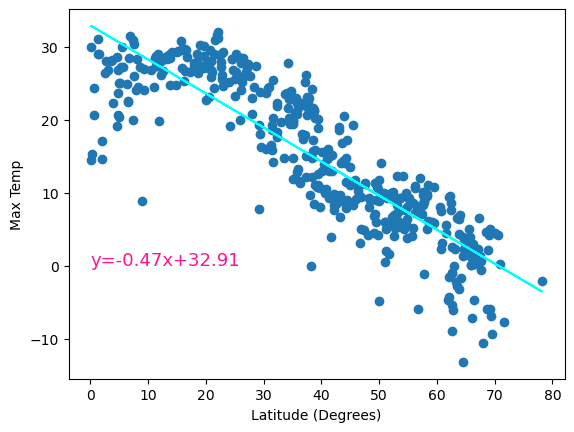

In [35]:
# Linear regression on nhemi
xs=nhemi["Lat"]
ys=nhemi["Max Temp"]
plot_linear_regression(xs, ys, 0, 0)

The r-value is: 0.46326398901783433


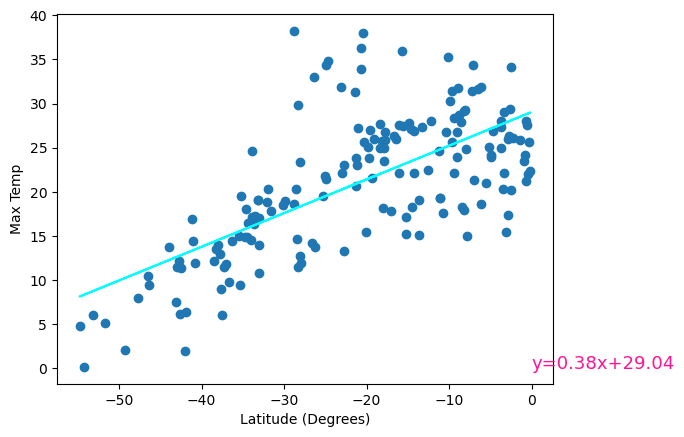

In [36]:
# Linear regression on shemi
xs=shemi["Lat"]
ys=shemi["Max Temp"]
plot_linear_regression(xs, ys, 0, 0)

The data indicate a moderate correlation between proximity to Earth's South Pole and temperatures, and a strong correlation between proximity to the North Pole and temperatures.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.03490784547342345


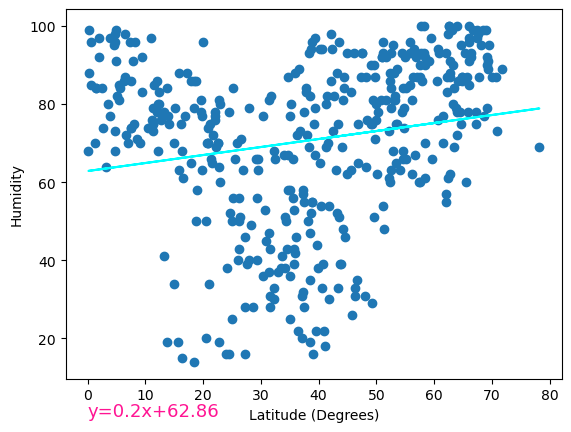

In [37]:
# nhemi
xs=nhemi["Lat"]
ys=nhemi["Humidity"]
plot_linear_regression(xs, ys, 45, 15)

The r-value is: 0.03490784547342345


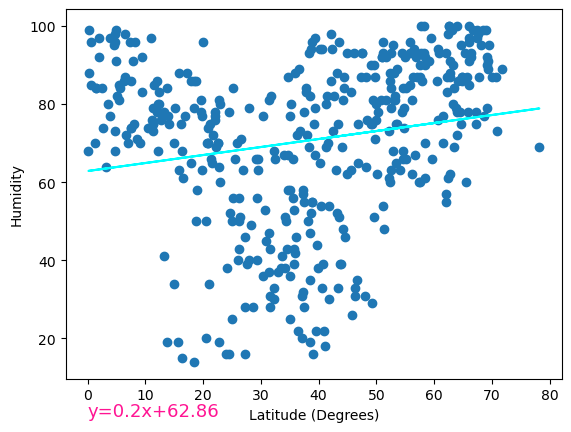

In [38]:
# shemi
xs=nhemi["Lat"]
ys=nhemi["Humidity"]
plot_linear_regression(xs, ys, 80, 10)

The relationship between humidity and latitude is too weak to suggest any significant correlation.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.013074055223075969


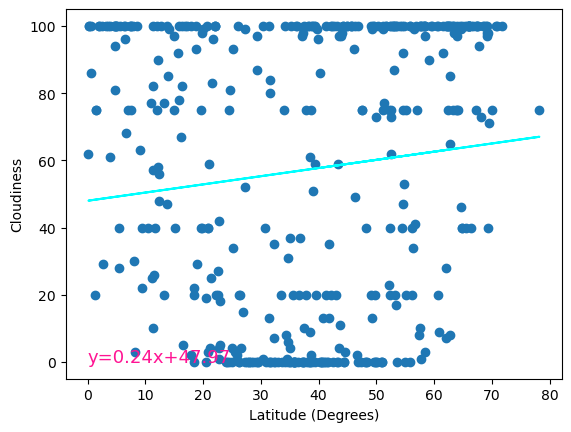

In [57]:
# nhemi
xs=nhemi["Lat"]
ys=nhemi["Cloudiness"]
plot_linear_regression(xs, ys, 80, 80)

In [ ]:
#y=.24x+47.97

The r-value is: 0.011657815859088844


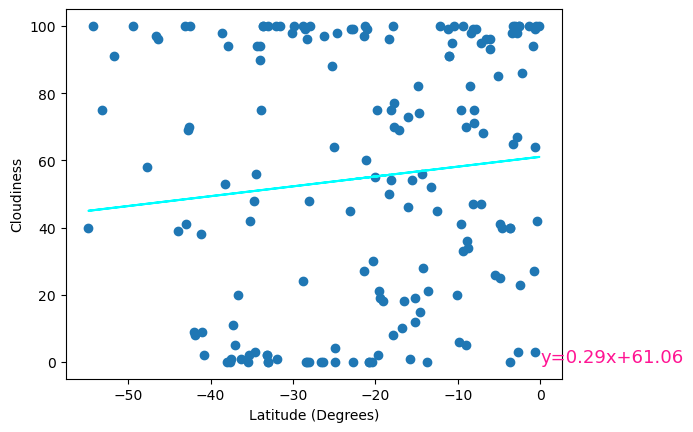

In [20]:
# shemi
xs=shemi["Lat"]
ys=shemi["Cloudiness"]
plot_linear_regression(xs, ys, -55, 25)

Latitude and cloudiness also do not appear to significantly correlate with each other.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.05200510753939551


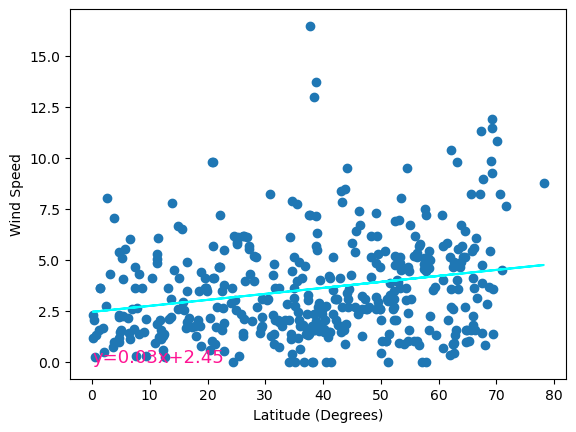

In [63]:
# nhemi
xs=nhemi["Lat"]
ys=nhemi["Wind Speed"]
plot_linear_regression(xs, ys, 80, 15)

In [ ]:
#y=.03x+2.45

The r-value is: 0.06094498612780954


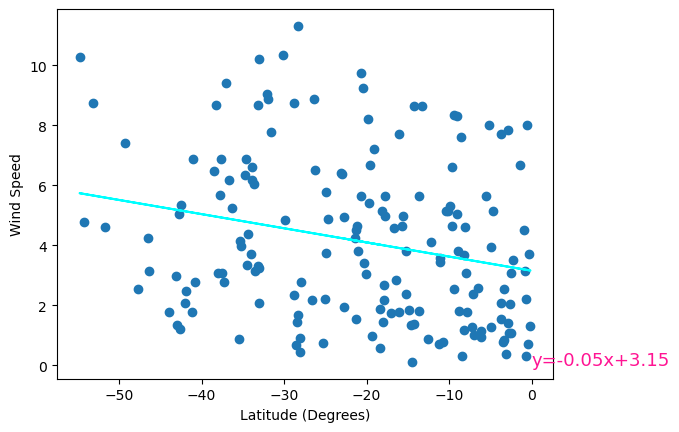

In [64]:
# shemi
xs=shemi["Lat"]
ys=shemi["Wind Speed"]
plot_linear_regression(xs, ys, 0, 0)

Wind speed and latitude also do not appear to be significantly correlated.